### Introduction

This iPython notebook shows how to use the gisaxspy functionality on your experiment data. In order to make full use of the functionality, you need two datafiles in csv format and a path to the GISAXS images in a tif format. The csv files are located in this repository as an example, but the scattering images are not available.

### Loading the gisaxpy module
To load the gisaxspy module, place the gisaxspy.py file in your working directory and type in the following two lines. The

>`%matplotlib inline` 

command is responsible for plotting directly to the notebook.

In [1]:
from gisaxspy import *
%matplotlib inline

### Loading data
To load the data, simply create an object using the gisaxsExperiment class. In the simplest form, three arguments are supplied, the thickness data, the gisaxs data and the image path. The script assumes that the two datafiles start at the same time. In this example, the thickness data starts at `t=2425` seconds and the gisaxs data starts at `t=1821` seconds, but both of these are set to `t=0` before synching the data. For more control, the optional `offset` parameter adds an offset (in seconds) to the thickness data.

#### Thickness data
The thickness data should be supplied in csv format with two columns. The first column is the time in seconds and the second column is the film thickness in nm. In this example, the file is is in our working directory and has the filename `ex_wli.csv`.

#### GISAXS data
The GISAXS data should be supplied in csv format with three columns. The first column is image number, the second column is the time in seconds and the third column is x-axis position of the sample. In this example, the file is `ex_gisaxs.csv`.

#### Image path
The GISAXS image path is simply the path to the scattering data on your computer. Use the # sign in place of numbers in the filenames. In this example the images are located at `C:\Scattering\CHESS_2015_DATA\corr\pspb05_###.tif`.

In [2]:
test = gisaxsExperiment('ex_wli.csv', 'ex_gisaxs.csv', 'C:\Scattering\CHESS_2015_DATA\corr\pspb05_###.tif', offset=0)

### Experiment parameters
The gisaxspy object (in this example: `test`), has a set of parameters that can be changed according to the details of the expriment. The defaults are as shown below.

In [3]:
test.wavelength = 1.155*angstrom  # wavelength of the X-ray beam
test.SD = 1845.0*milimeter  # Sample-Detector distance
test.alpha_i = 0.14*degree  # incidence angle
test.db_x = 534  # direct beam x value in pixels
test.db_y = 53 # direct beam y value in pixels
test.pixelsize = 46.9*micrometer  # the pixel size of the detector
test.clim = (10.0, 3000)  # limits (lower, upper) for the color plot, change if the details are hard to make out.
test.qylim = [-0.6, 0.6]  # q_y limits in nm^(-1) for the showImg command.
test.qzlim = [0, 0.7]  # q_z limits  in nm^(-1) for the showImg command.
test.dpi = 80  # resolution of the saved images, increase for more detail.
test.time_format = 'minutes'  # x axis for the time plots. options are: 'minutes', 'seconds'.
test.phi_plot = True  # set to False in order to plot thickness rather than phi.

### Displaying thickness data
the `showWLI()` command simply displays a plot the thickness data. 

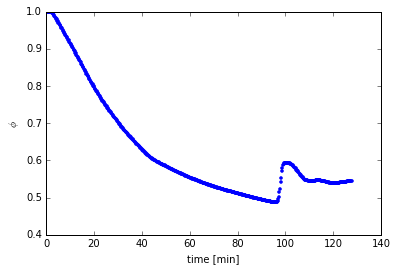

In [4]:
test.showWLI()

### Displaying GISAXS images
To display gisaxs images use the `showImg()` command. This image is displayed in $(q_y, q_z)$ coordinates and the details are in the image title. In the example below, we display image number 180.

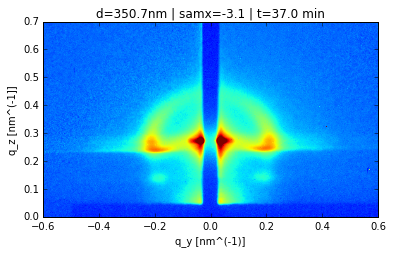

In [5]:
test.showImg(180)

### Saving GISAXS images
To save every image from the experiment in the above format, use the `saveImages()` function. All images are saved in the current directory as `.png`. Using the optional `range` parameter allows for saving only certain images.

In [6]:
#test.saveImages()
test.saveImages(range=[32, 33, 34, 35, 36])

### Displaying DPDAK data 
With the `dpdakPlot()` command, it is possible to load peakfitting data created using the [DPDAK](https://dpdak.desy.de/index.php/Hauptseite) software package. As of this writing, DPDAK is at version 1.2. To export data from DPDAK, use 

> Export -> DB Text Export

From the menu bar. Export the fitting parameters (`fit_param`), uncheck "Transpose Data" and check "Indices as input sequence numbers". In this example, I used Auto Peak Fit with a Lorenzian function. This results in a datafile with 3 rows: 

* Position in q-space
* FWHM
* Area

The `row` parameter choses which of these rows to display (remember: computers count from 0). The `yrange` parameter choses what range of values to display, and the `yname` parameter is simply the label on the y-axus. The `show_wli` parameter displays the thickness data on top of the peakfitting data. To filter out certain x-axis positions, use the `samx_range` parameter.

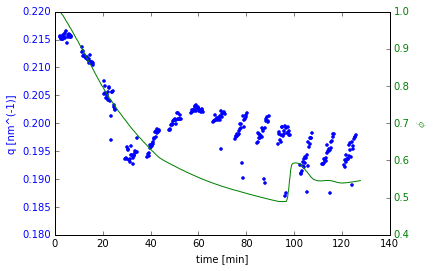

In [9]:
test.dpdakPlot('ex_dpdak.dat', row=0, yrange=[0.18,0.22], yname='q [nm^(-1)]', show_wli=True, samx_range=[-1, 5])